### Restaurant Data Analysis

### Overview:
- Analyzing restaurant data to uncover insights about customer preferences, service impact, and pricing trends. By leveraging features such as location (City, Longitude, Latitude), services (Has Table Booking, Has Online Delivery), and customer feedback (Aggregate Rating, Votes), 
- The analysis aims to identify factors influencing restaurant popularity and success. 
- The project will also explore cuisine trends, regional pricing differences, and correlations between services and ratings, providing actionable insights for restaurant businesses.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Dataset .csv')
data


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Exploratory Data Analysis
### Level - 1

### Task 1: Data Exploration and Preprocessing

In [5]:
print("Dataset Overview:")
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

Dataset Overview:
Rows: 9551, Columns: 21


In [6]:
data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [7]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
# Dropping null values in 'Cuisines'
data.dropna(axis=0, inplace=True)

In [9]:
# Analyzing target variable ('Aggregate rating')
print("\nTarget Variable Analysis:")
print(data['Aggregate rating'].describe())


Target Variable Analysis:
count    9542.000000
mean        2.665238
std         1.516588
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64



 Aggregate Rating Distribution:
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     332
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     143
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      41
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


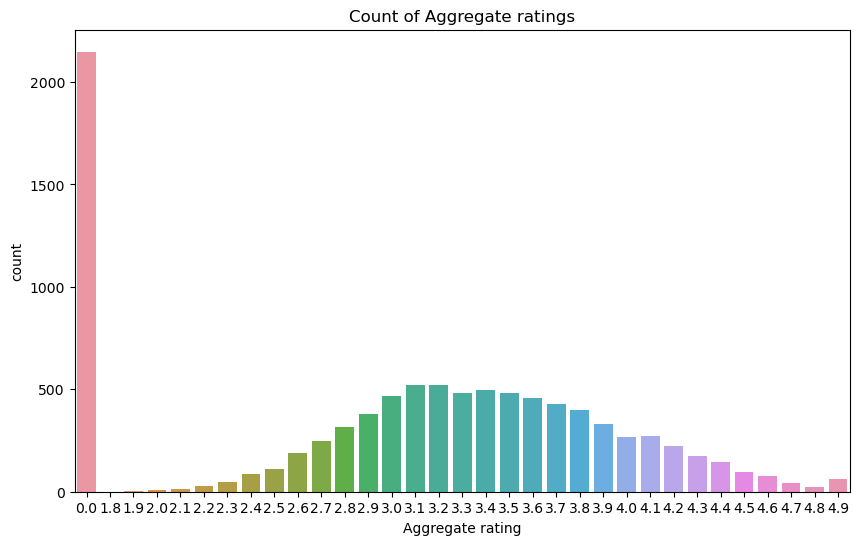

In [10]:
# Distribution of Target column 'Aggregate rating'
print("\n Aggregate Rating Distribution:")
print(data['Aggregate rating'].value_counts())

plt.figure(figsize=(10, 6))
# Plot the count of 'Aggregate rating'
sns.countplot(data=data, x='Aggregate rating')
plt.title('Count of Aggregate ratings')
plt.show()

### Task 2: Descriptive Analysis

In [11]:
# Basic statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
data.describe()


Descriptive Statistics for Numerical Columns:


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Most Restaurants By Country_code:  Country Code
1      8652
216     425
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64


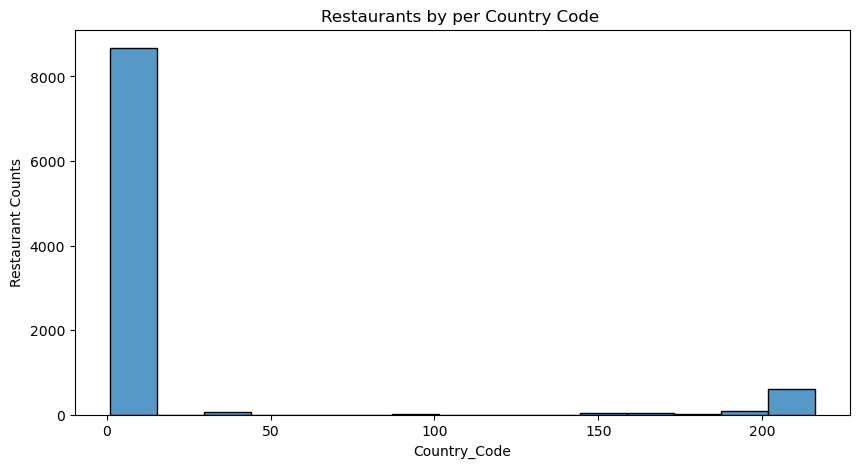

In [12]:
# Distribution of most Restaurants in country by country code
print('Most Restaurants By Country_code: ', data['Country Code'].value_counts())
plt.figure(figsize=(10, 5))
sns.histplot( x=data['Country Code'])
plt.ylabel('Restaurant Counts')
plt.title('Restaurants by per Country Code ')
plt.xlabel("Country_Code")
plt.show()

In [13]:
# Distribution of top cities and cuisines
top_cities = data['City'].value_counts().head(10)
top_cuisines = data['Cuisines'].value_counts().head(10)

In [14]:
print(f"Top Cities:{top_cities}")

Top Cities:City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: count, dtype: int64


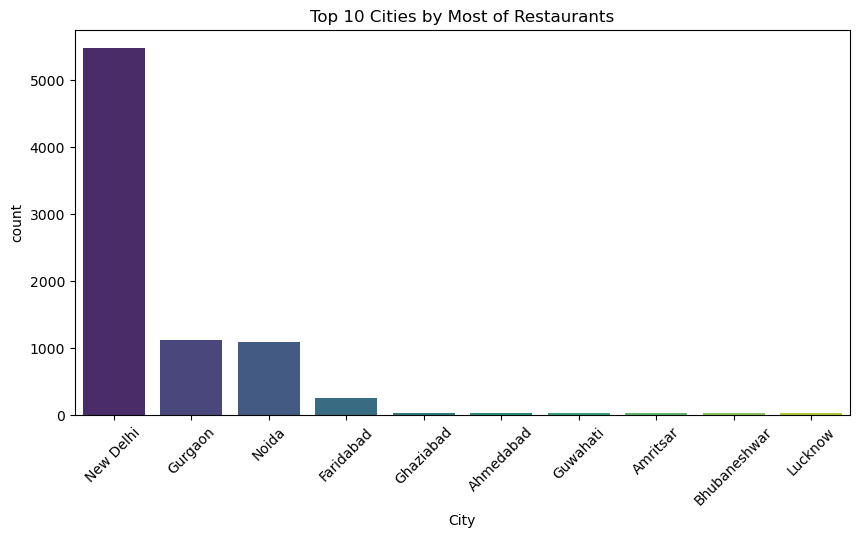

In [15]:
# Plot distributions
plt.figure(figsize=(10, 5))
sns.countplot(x=data['City'], order=top_cities.index, palette="viridis")
plt.title("Top 10 Cities by Most of Restaurants")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.show()

In [16]:
print(f"Top Cuisines:{top_cuisines}")

Top Cuisines:Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


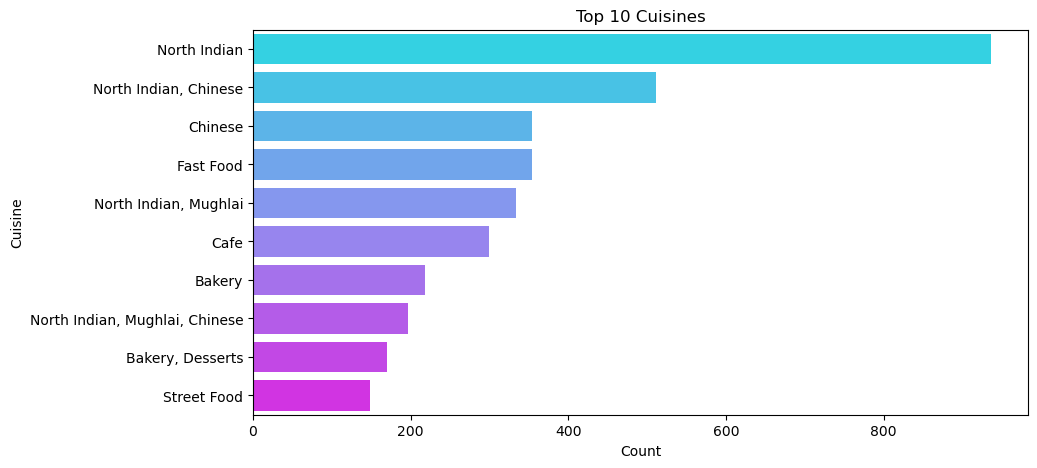

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="cool")
plt.title("Top 10 Cuisines")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

### Task 3: Geospatial Analysis

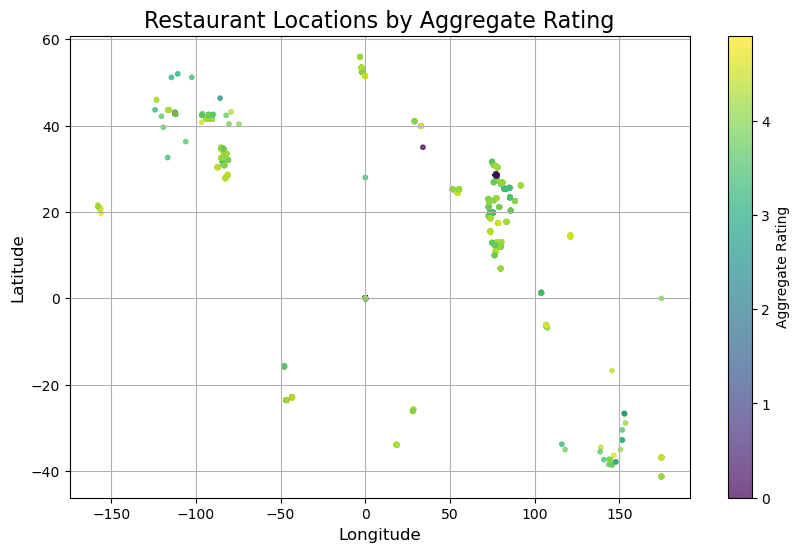

In [18]:
#scatter plot of Accurate restaurant locations with latitude and longitude
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], 
            c=data['Aggregate rating'], 
            cmap='viridis', 
            alpha=0.7, 
            s=10)

plt.colorbar(label='Aggregate Rating')
plt.title('Restaurant Locations by Aggregate Rating', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

plt.grid(True)
plt.show()

### Level - 2

### Task - 1: Table Booking and Online Delivery


In [19]:
# Percentage of restaurants offering table booking and online delivery
table_booking = (data['Has Table booking'] == 'Yes').mean() * 100
online_delivery = (data['Has Online delivery'] == 'Yes').mean() * 100

In [20]:
print(f"Restaurants offering table booking: {table_booking:.2f}%")
print(f"Restaurants offering online delivery: {online_delivery:.2f}%")

Restaurants offering table booking: 12.14%
Restaurants offering online delivery: 25.69%


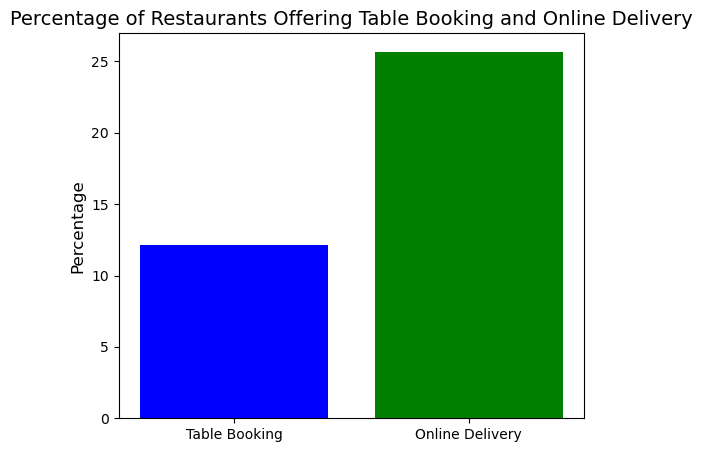

In [21]:
labels = ['Table Booking', 'Online Delivery']
values = [table_booking, online_delivery]

plt.figure(figsize=(6, 5))
plt.bar(labels, values, color=['blue', 'green'])
plt.title('Percentage of Restaurants Offering Table Booking and Online Delivery', fontsize=14)
plt.ylabel('Percentage', fontsize=12)
plt.show()

In [22]:
# Comparing average ratings for restaurants with and without table booking
avg_rating_with_booking = data[data['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_booking = data[data['Has Table booking'] == 'No']['Aggregate rating'].mean()

In [23]:
print(f"Average rating with table booking: {avg_rating_with_booking:.2f}")
print(f"Average rating without table booking: {avg_rating_without_booking:.2f}")

Average rating with table booking: 3.44
Average rating without table booking: 2.56


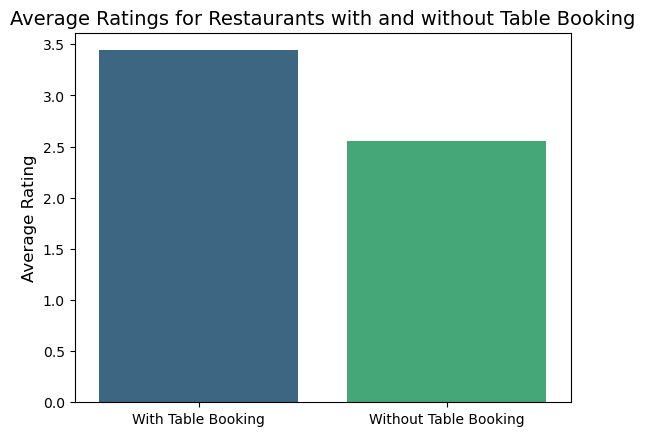

In [24]:
sns.barplot(
    x=['With Table Booking', 'Without Table Booking'],
    y=[avg_rating_with_booking, avg_rating_without_booking],
    palette='viridis'
)
plt.title('Average Ratings for Restaurants with and without Table Booking', fontsize=14)
plt.ylabel('Average Rating', fontsize=12)
plt.show()

In [25]:
#  Analyzing online delivery availability among different price ranges
delivery_by_price = data.groupby(['Price range','Has Online delivery'])['Has Online delivery'].count().unstack()
delivery_by_price

Has Online delivery,No,Yes
Price range,,
1,3737,701
2,1827,1286
3,994,411
4,533,53


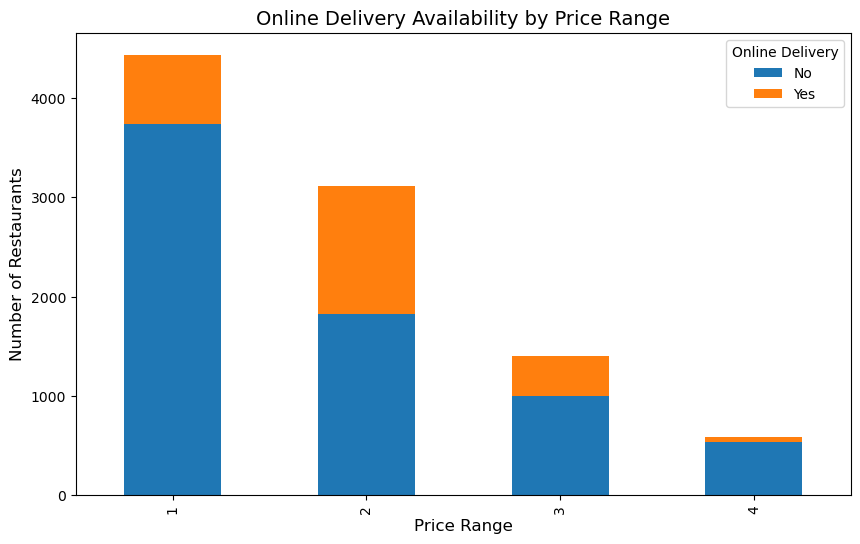

In [26]:

#  Online Delivery Availability by Price Range
delivery_by_price.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Online Delivery Availability by Price Range', fontsize=14)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.legend(title='Online Delivery', labels=['No', 'Yes'])
plt.show()

## Level_2
### Task 2: Price Range Analysis 

In [27]:
# Determine the most common price range
common_price_range = data['Price range'].value_counts().idxmax()
print(f"The most common price range is: {common_price_range}")

The most common price range is: 1


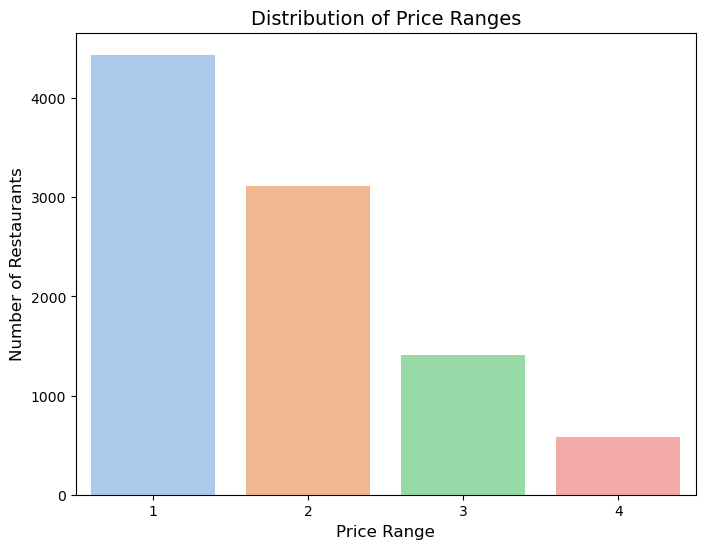

In [28]:
# Visualization in Distribution of Price Ranges
plt.figure(figsize=(8, 6))
sns.countplot(x='Price range', data=data, palette='pastel')
plt.title('Distribution of Price Ranges', fontsize=14)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.show()

In [29]:
# Calculate the average rating for each price range
average_rating_by_price = data.groupby('Price range')['Aggregate rating'].mean()
print("\nAverage rating for each price range:")
print(average_rating_by_price)


Average rating for each price range:
Price range
1    1.997476
2    2.941054
3    3.682633
4    3.817918
Name: Aggregate rating, dtype: float64


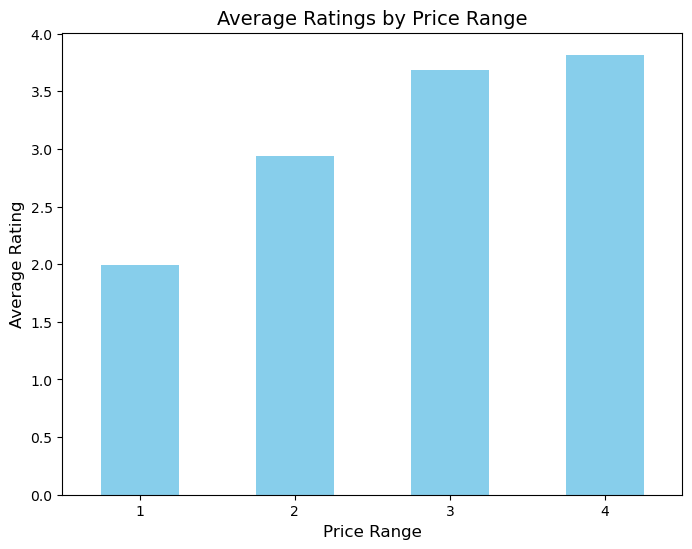

In [30]:
# Visualization of Average Ratings by Price Range
average_rating_by_price.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Average Ratings by Price Range', fontsize=14)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [31]:
# Identify the color representing the highest average rating
highest_avg_rating_price_range = average_rating_by_price.idxmax()
highest_avg_rating_color = data[data['Price range'] == highest_avg_rating_price_range]['Rating color'].mode()[0]

print(f"\nPrice range with the highest average rating: {highest_avg_rating_price_range}")
print(f"Color representing the highest average rating: {highest_avg_rating_color}")


Price range with the highest average rating: 4
Color representing the highest average rating: Yellow


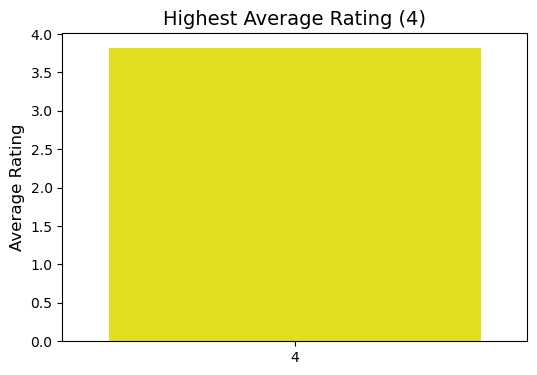

In [32]:
# Visualization 3: Rating Color for Highest Average Rating
plt.figure(figsize=(6, 4))
sns.barplot(x=[highest_avg_rating_price_range], y=[average_rating_by_price.max()], palette=[highest_avg_rating_color])
plt.title(f'Highest Average Rating ({highest_avg_rating_price_range})', fontsize=14)
plt.ylabel('Average Rating', fontsize=12)
plt.show()

### Level _2
### Task 3 : Feature Engineering

In [33]:
# Using labelencoding to encode because,This works well for categorical data with and without ordinal relationships  
# List of columns to scale using Label encoding
columns_to_encode = ['City','Currency', 'Has Table booking', 'Rating color', 'Rating text',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu']



In [34]:
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
encoder = LabelEncoder()

# Applying Encode to each column separately
for column in columns_to_encode:
    data[column] = encoder.fit_transform(data[column])

<Axes: >

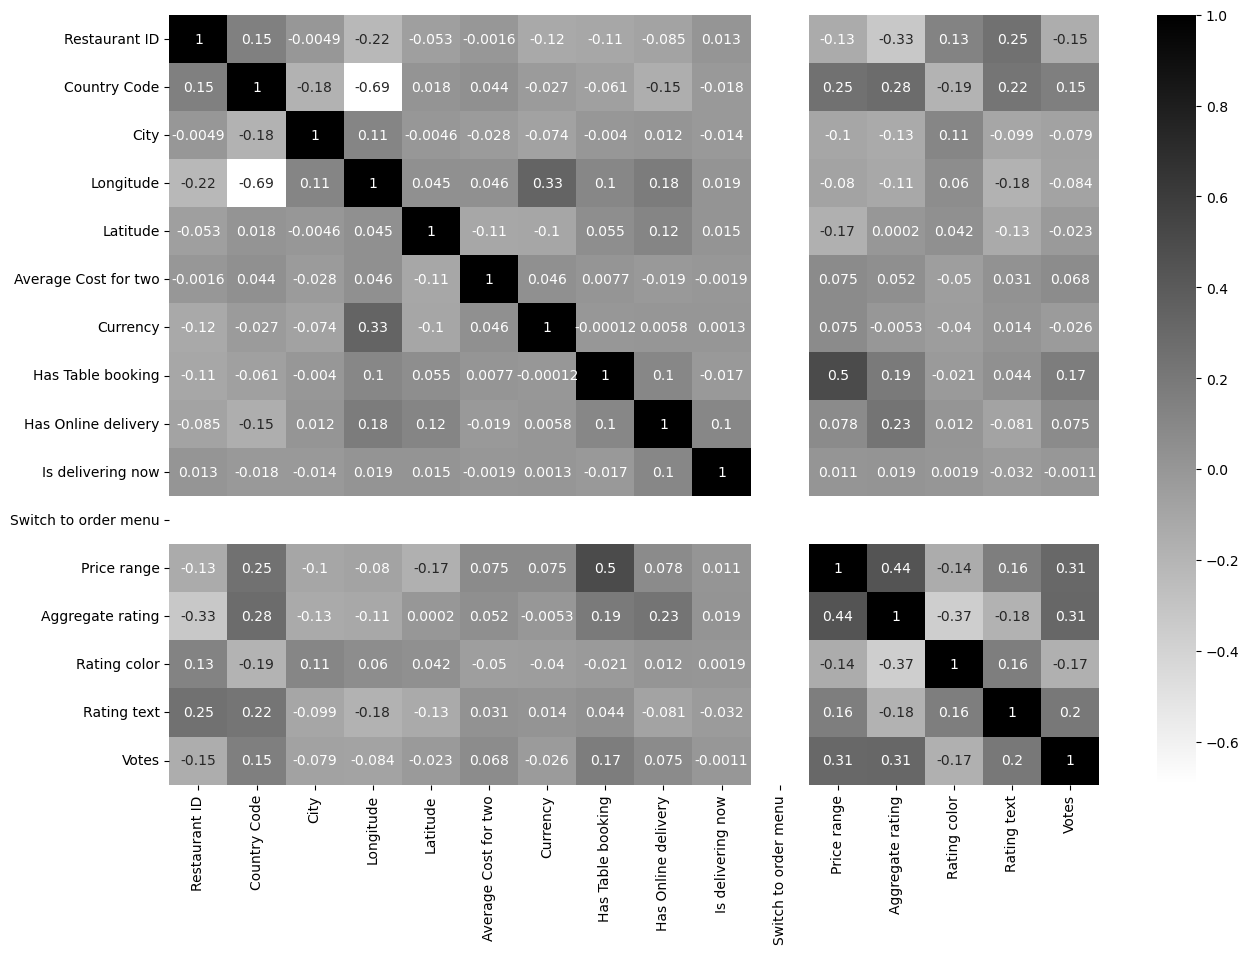

In [35]:
#Correlation
corr =data.select_dtypes('number').corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='binary')

In [36]:
#Correlation with the target value "Aggregate rating"
data.select_dtypes('number').corr()['Aggregate rating'].sort_values(ascending=False)

Aggregate rating        1.000000
Price range             0.438356
Votes                   0.313474
Country Code            0.281295
Has Online delivery     0.226250
Has Table booking       0.190351
Average Cost for two    0.051864
Is delivering now       0.019231
Latitude                0.000197
Currency               -0.005337
Longitude              -0.114733
City                   -0.130848
Rating text            -0.182835
Restaurant ID          -0.327160
Rating color           -0.367379
Switch to order menu         NaN
Name: Aggregate rating, dtype: float64

In [ ]:
# List of columns to analyze
columns = ['Country Code', 'City', 'Longitude', 'Latitude',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes']

# Create box plots for each column
plt.figure(figsize=(12,8))
data[columns].boxplot()
plt.title('Box Plot for Numerical Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [38]:
from scipy.stats import zscore
threshold = 3
# Analyze each column with percentage of Outliers
for col in columns:
    
    z_scores = zscore(data[col])  
    outliers = data[abs(z_scores) > threshold]
    percentage_outliers = (len(outliers) / len(data)) * 100
    
    # Print the results
    print(f"Feature: {col}")
    print(f"Percentage of outliers: {percentage_outliers:.2f}%\n")


Feature: Country Code
Percentage of outliers: 7.12%

Feature: City
Percentage of outliers: 1.89%

Feature: Longitude
Percentage of outliers: 4.50%

Feature: Latitude
Percentage of outliers: 1.92%

Feature: Average Cost for two
Percentage of outliers: 0.22%

Feature: Currency
Percentage of outliers: 3.10%

Feature: Has Table booking
Percentage of outliers: 0.00%

Feature: Has Online delivery
Percentage of outliers: 0.00%

Feature: Is delivering now
Percentage of outliers: 0.36%

Feature: Switch to order menu
Percentage of outliers: 0.00%

Feature: Price range
Percentage of outliers: 0.00%

Feature: Aggregate rating
Percentage of outliers: 0.00%

Feature: Rating color
Percentage of outliers: 0.00%

Feature: Rating text
Percentage of outliers: 0.00%

Feature: Votes
Percentage of outliers: 1.81%



In [39]:

for col in columns:
    
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data[col] = np.where(data[col] < lower_bound, lower_bound,
                         np.where(data[col] > upper_bound, upper_bound, data[col]))

In [40]:

for col in columns:
    
    z_scores = zscore(data[col])  
    outliers = data[abs(z_scores) > threshold]
    percentage_outliers = (len(outliers) / len(data)) * 100
    
    # Print the results
    print(f"Feature: {col}")
    print(f"Percentage of outliers: {percentage_outliers:.2f}%\n")

Feature: Country Code
Percentage of outliers: 0.00%

Feature: City
Percentage of outliers: 0.00%

Feature: Longitude
Percentage of outliers: 0.00%

Feature: Latitude
Percentage of outliers: 0.00%

Feature: Average Cost for two
Percentage of outliers: 0.00%

Feature: Currency
Percentage of outliers: 0.00%

Feature: Has Table booking
Percentage of outliers: 0.00%

Feature: Has Online delivery
Percentage of outliers: 0.00%

Feature: Is delivering now
Percentage of outliers: 0.00%

Feature: Switch to order menu
Percentage of outliers: 0.00%

Feature: Price range
Percentage of outliers: 0.00%

Feature: Aggregate rating
Percentage of outliers: 0.00%

Feature: Rating color
Percentage of outliers: 0.00%

Feature: Rating text
Percentage of outliers: 0.00%

Feature: Votes
Percentage of outliers: 0.00%



In [41]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

##### Feature Selection

In [42]:
X = data.drop(columns=['Restaurant Name','Address','Locality', 'Locality Verbose','Cuisines','Aggregate rating'])
y = data['Aggregate rating'] 

In [43]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [44]:
print(selection.feature_importances_)

[0.00661549 0.         0.00093712 0.00328132 0.00312321 0.00279247
 0.         0.         0.00064193 0.         0.         0.00836332
 0.31423026 0.39991748 0.2600974 ]


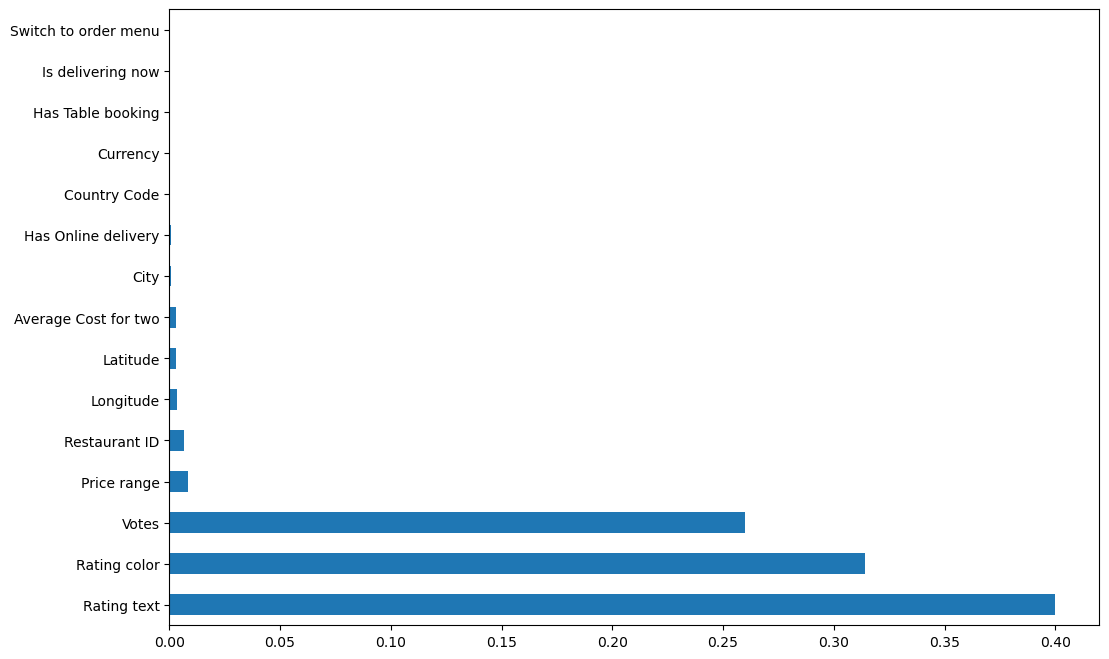

In [45]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### LEVEL 3
### Task : 1 - Predictive Modelling

In [46]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

###  1. Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [48]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred_linear = linear_model.predict(X_test)

In [50]:
print('R2_score:', metrics.r2_score(y_test, y_pred_linear))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_linear))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_linear))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))

R2_score: 0.570733007522759
MAE: 0.6654815664049571
MSE: 0.6687651802541751
RMSE: 0.817780643115362


In [51]:
Lr=metrics.r2_score(y_test, y_pred_linear)
LR_score =Lr * 100

print(f"\033[1mAccuracy of Random Forest Regressor: {LR_score :.2f}%\033[0m")

Accuracy of Random Forest Regressor: 57.07%


### 2. L2-Ridge Regressor

In [52]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()

In [53]:
param_grid = {
    'alpha': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']  # Solver to use
}

In [54]:
#GridSearchCV with cross-validation
grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [55]:
grid_search_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr']},
             scoring='neg_mean_squared_error')

In [56]:
# Getting the best model and its parameters
best_ridge_model = grid_search_ridge.best_estimator_
best_params = grid_search_ridge.best_params_

In [57]:
pred_ridge = best_ridge_model.predict(X_test)

In [58]:
print('R2_score:', metrics.r2_score(y_test, pred_ridge))
print('MAE:', metrics.mean_absolute_error(y_test,pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))

R2_score: 0.5707298862723166
MAE: 0.6654339351576928
MSE: 0.6687700429239154
RMSE: 0.8177836161992458


In [59]:
L2=metrics.r2_score(y_test, pred_ridge)
L2_score =L2 * 100

print(f"\033[1mAccuracy of Random Forest Regressor: {L2_score :.2f}%\033[0m")

Accuracy of Random Forest Regressor: 57.07%


### 3.RandomForestRegressor

In [60]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
y_pred = reg_rf.predict(X_test)

In [62]:
print('R2_score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2_score: 0.9819193321772985
MAE: 0.11431176316478965
MSE: 0.028168299187843852
RMSE: 0.1678341419015924


### Hyper parameter Tuning - RandomForestRegressor

In [63]:
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],            
    'max_depth': [10, 20, 30, None],          
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4],             
    'max_features': ['auto', 'sqrt', 'log2'], 
}

In [64]:
# Perform GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [65]:
best_rf_model = grid_search_rf.best_estimator_
best_params = grid_search_rf.best_params_

In [66]:
RF_pred= best_rf_model .predict(X_test)

In [67]:
print('R2_score:', metrics.r2_score(y_test, RF_pred))
print('MAE:', metrics.mean_absolute_error(y_test, RF_pred))
print('MSE:', metrics.mean_squared_error(y_test, RF_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RF_pred)))

R2_score: 0.9819603127843666
MAE: 0.11597067416474453
MSE: 0.028104454532761877
RMSE: 0.1676438323731651


In [68]:
RF=metrics.r2_score(y_test, RF_pred)
RF_score =RF* 100

print(f"\033[1mAccuracy of Random Forest Regressor: {RF_score:.2f}%\033[0m")

Accuracy of Random Forest Regressor: 98.20%


### 4.XGB_Regressor

In [69]:
from xgboost import XGBRegressor

In [70]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [71]:
y_pred3 = xgb.predict(X_test)

In [72]:
print('R2_score:', metrics.r2_score(y_test, y_pred3))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

R2_score: 0.9799506050714955
MAE: 0.12244246159356896
MSE: 0.031235425616982147
RMSE: 0.17673546790891223


### Hyper Parameter Tuning -  XGB_Regressor

In [73]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

In [74]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],                 
    'learning_rate': [0.01, 0.05, 0.1],    
    'subsample': [0.8, 1.0], 
    'colsample_bytree': [0.8, 1.0],        
    'gamma': [0, 1, 5],                     
    'reg_alpha': [0, 0.1, 1],               # L1 regularization term
    'reg_lambda': [1, 10],                  # L2 regularization term
}

In [75]:
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 1, 5],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0, 0.1, 1], 'reg_lambda': [1, 10],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [76]:
# Get the best parameters and model
best_xgb_model = grid_search_xgb.best_estimator_
best_params = grid_search_xgb.best_params_

In [77]:
XGB_pred= best_xgb_model.predict(X_test)

In [78]:
print('R2_score:', metrics.r2_score(y_test, XGB_pred))
print('MAE:', metrics.mean_absolute_error(y_test, XGB_pred))
print('MSE:', metrics.mean_squared_error(y_test, XGB_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,XGB_pred)))

R2_score: 0.9829483495698872
MAE: 0.11308222276739091
MSE: 0.026565168702390264
RMSE: 0.16298824712963284


In [79]:
XGB=metrics.r2_score(y_test, XGB_pred)
XGB_score =XGB* 100

print(f"\033[1mAccuracy of Xtreme Gradient Boosting Regressor: {XGB_score:.2f}%\033[0m")

Accuracy of Xtreme Gradient Boosting Regressor: 98.29%


#### Comparing All Metrics in Used Models

In [80]:
predictions = {
    'Linear Regression': y_pred_linear,
    'Ridge Regression': pred_ridge,
    'Random Forest': RF_pred,
    'XGBoost': XGB_pred
}
performance = []
for model_name, y_pred in predictions.items():
    performance.append({
        'Model': model_name,
        'R2 Score': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    })

In [81]:
performance_df = pd.DataFrame(performance)
performance_df

,Model,R2 Score,MAE,MSE,RMSE
0,Linear Regression,0.570733,0.665482,0.668765,0.817781
1,Ridge Regression,0.570730,0.665434,0.668770,0.817784
2,Random Forest,0.981960,0.115971,0.028104,0.167644
3,XGBoost,0.982948,0.113082,0.026565,0.162988


Text(0.5, 1.0, ' R2 score of all Regressors')

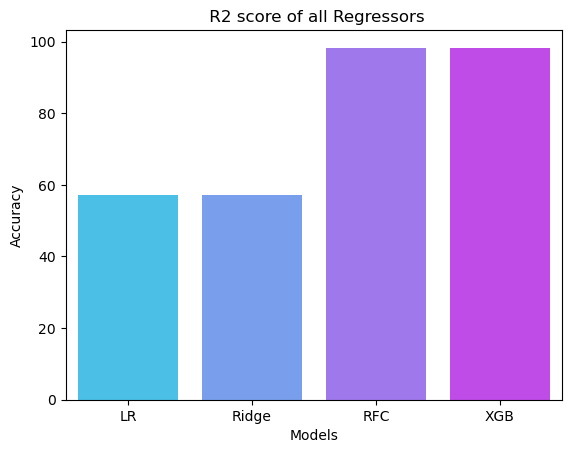

In [82]:
final_scores = pd.DataFrame({"Models":["LR","Ridge",'RFC',"XGB"],
                                 'Accuracy':[LR_score,L2_score,RF_score,XGB_score]})

sns.barplot(x=final_scores['Models'], y=final_scores["Accuracy"], palette='cool')
plt.title(" R2 score of all Regressors")

#### Random Forest and Xtreme Gradient Boosting  gaves a better score 98% 

### LEVEL 3
### Task - 2  Customer Preference Analysis

In [83]:
data['Cuisines'] = data['Cuisines'].str.split(', ')
# Exploding cuisines for detailed analysis
exploded_data = data.explode('Cuisines')


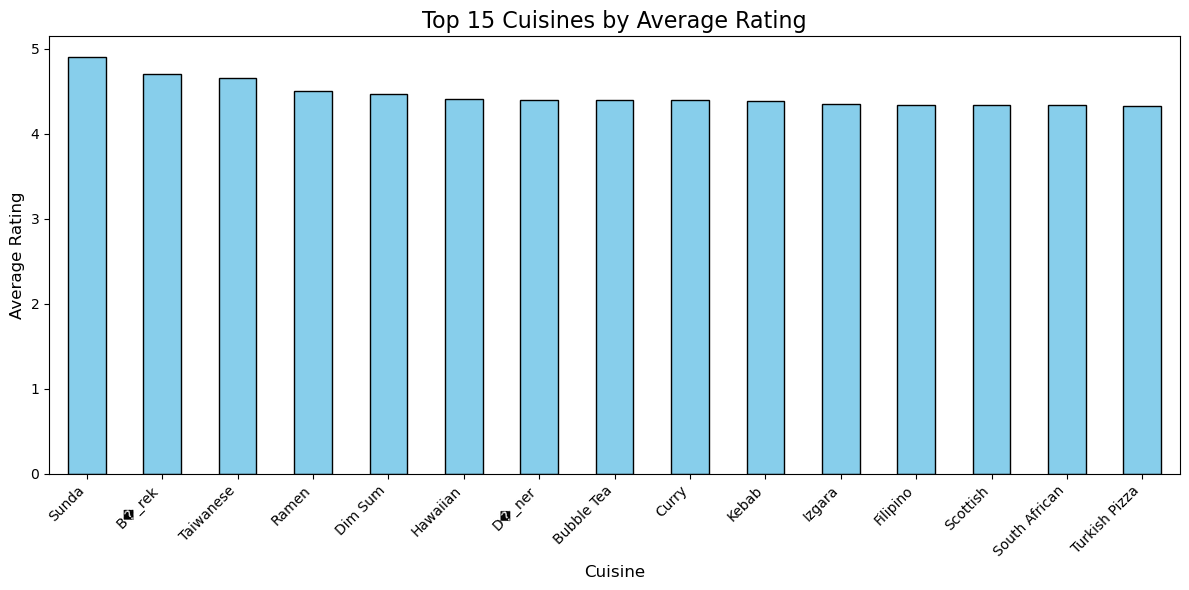

In [84]:
#  Analyze the relationship between the type of cuisine and the restaurant's rating
avg_rating_by_cuisine = exploded_data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

# Distribution Of average rating by cuisine
plt.figure(figsize=(12, 6))
avg_rating_by_cuisine.head(15).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 15 Cuisines by Average Rating', fontsize=16)
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

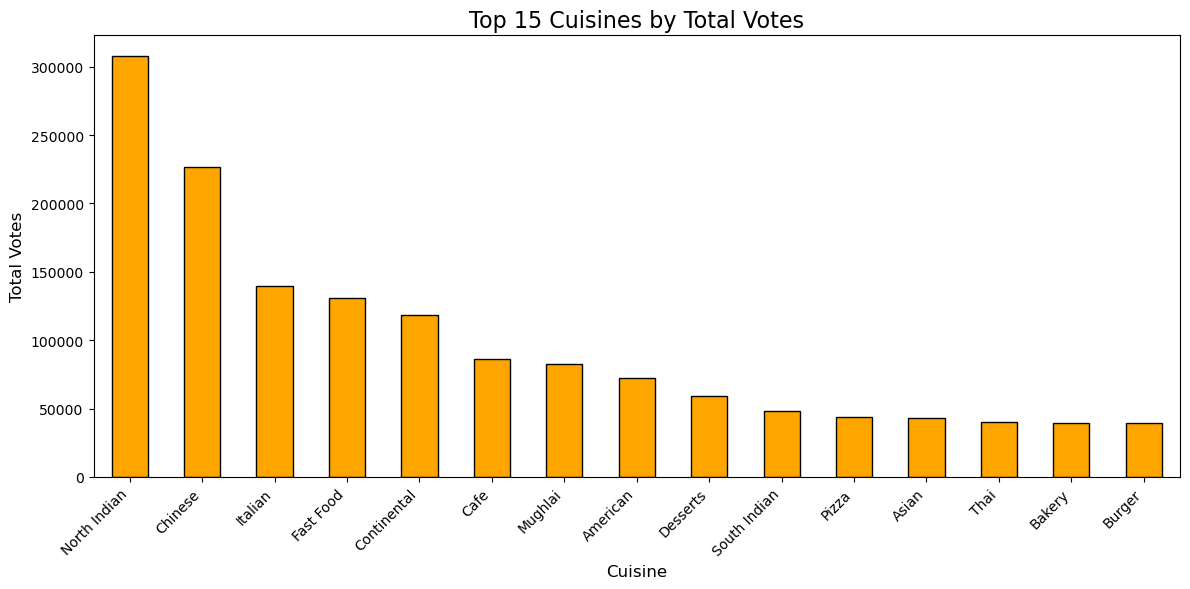

In [85]:
# Identify the most popular cuisines based on the number of votes
total_votes_by_cuisine = exploded_data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

# Plot the top 15 most popular cuisines based on votes
plt.figure(figsize=(12, 6))
total_votes_by_cuisine.head(15).plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 15 Cuisines by Total Votes', fontsize=16)
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Total Votes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### LEVEL 3
### Task 3-Data Visualization

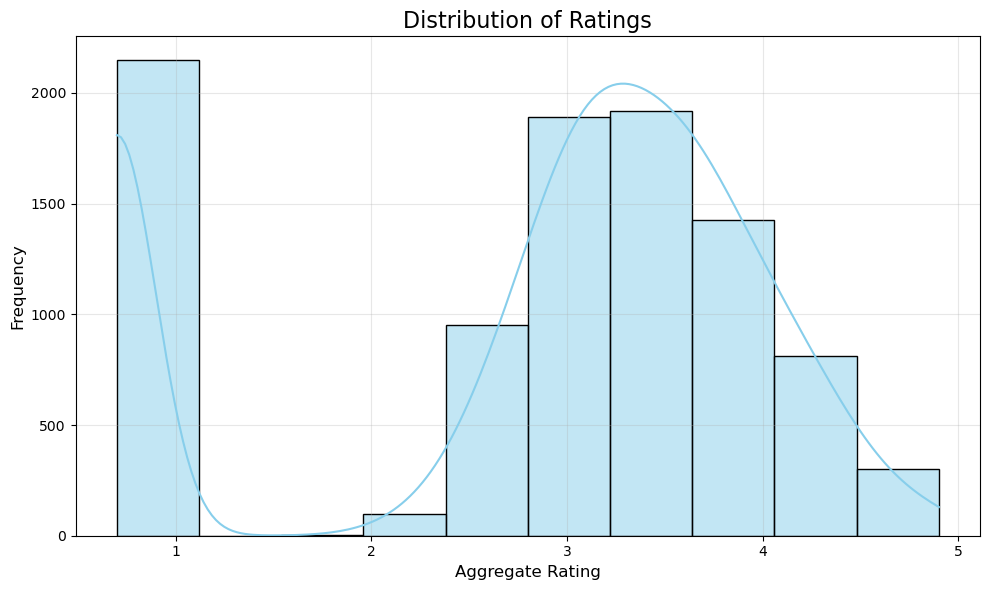

In [87]:
# 1. Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Aggregate rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

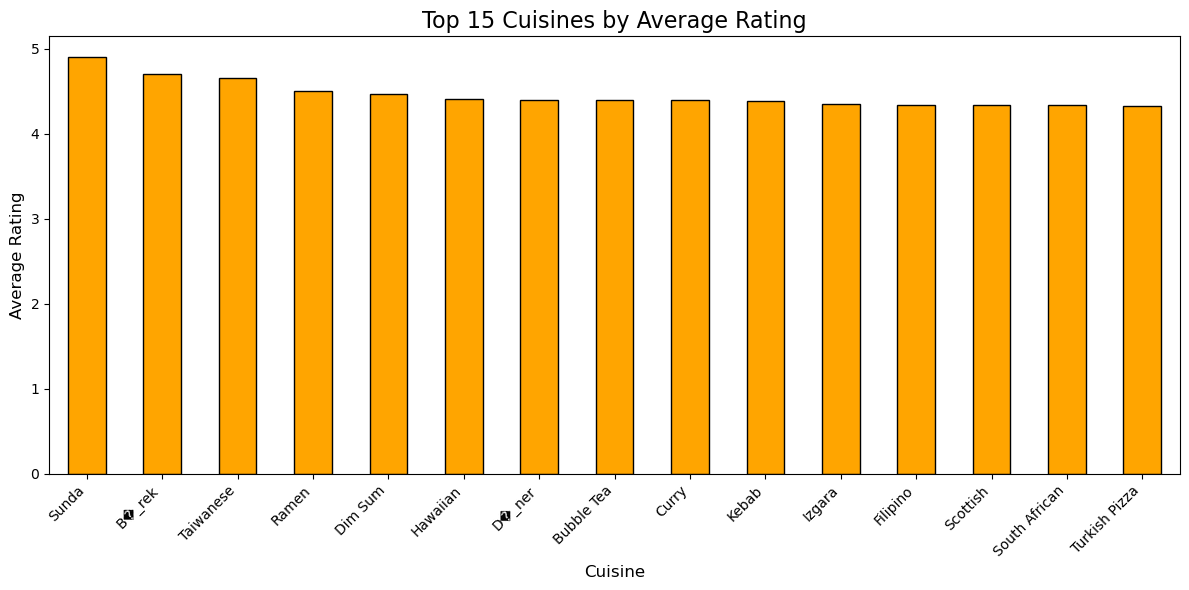

In [88]:
# 2. Average Ratings by Cuisines and Cities
avg_rating_by_cuisine = exploded_data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_rating_by_cuisine.head(15).plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 15 Cuisines by Average Rating', fontsize=16)
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

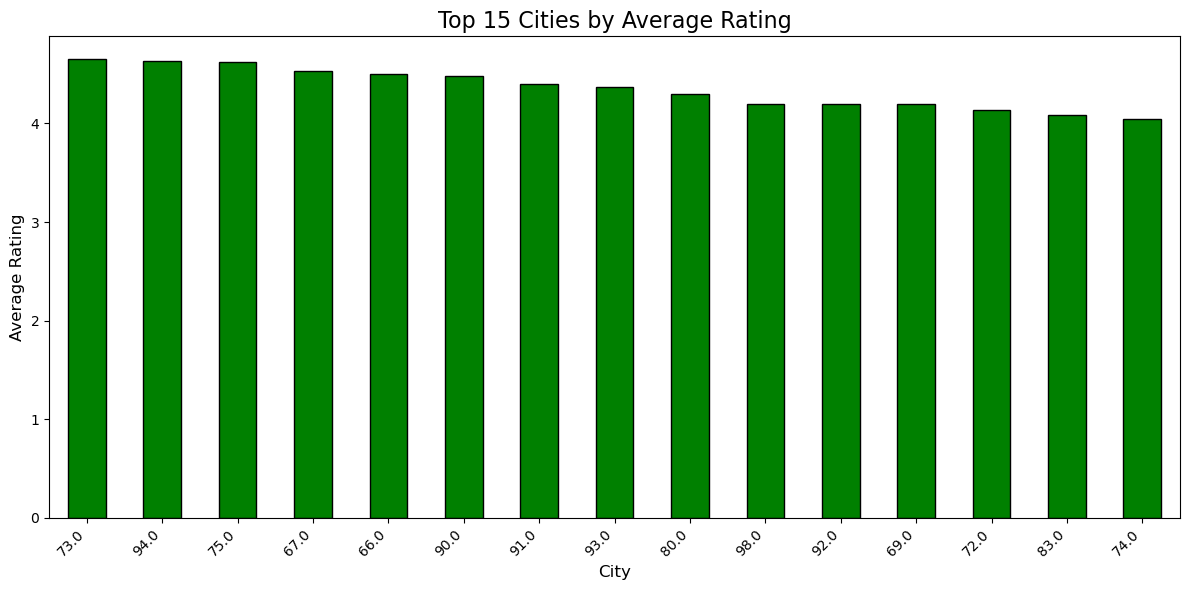

In [89]:
# Average ratings for cities
avg_rating_by_city = data.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_rating_by_city.head(15).plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 15 Cities by Average Rating', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

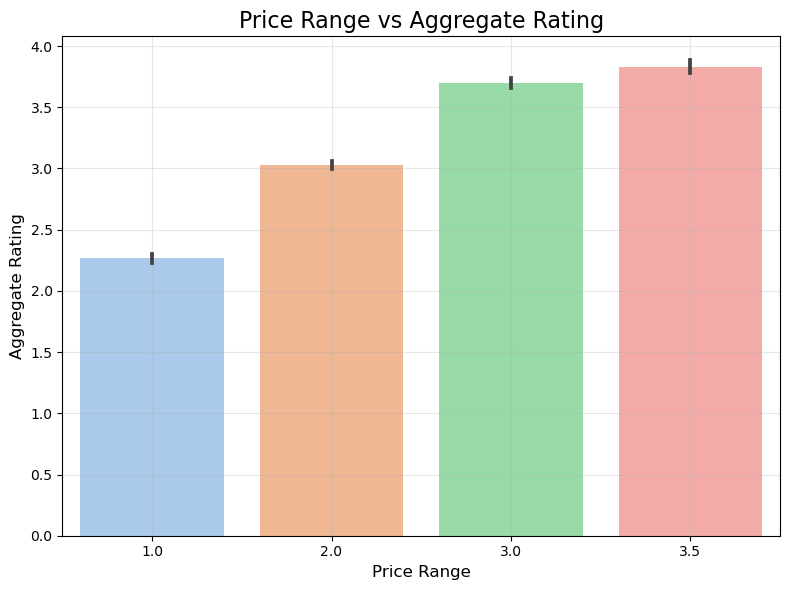

In [119]:
# Price range vs Aggregate rating
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Price range', y='Aggregate rating', palette='pastel')
plt.title('Price Range vs Aggregate Rating', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Aggregate Rating', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

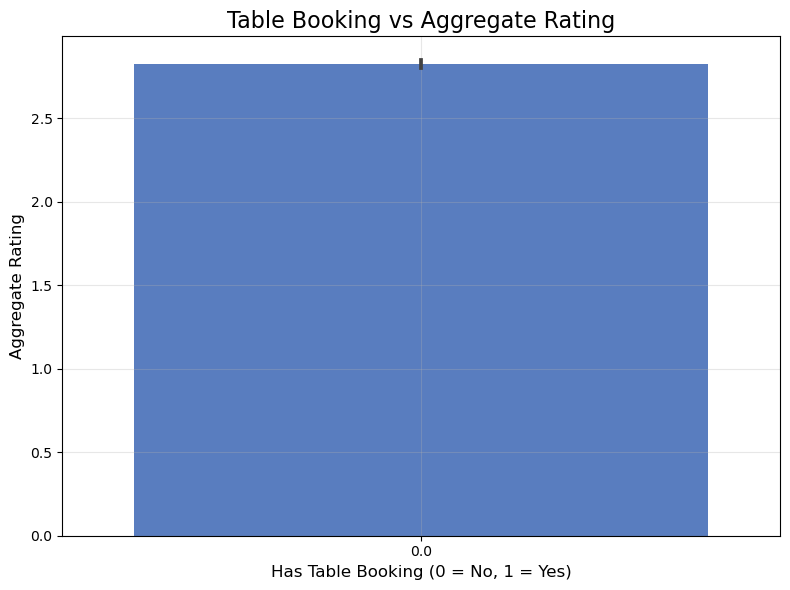

In [117]:
# Table Booking vs Aggregate rating
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Has Table booking', y='Aggregate rating', palette='muted')
plt.title('Table Booking vs Aggregate Rating', fontsize=16)
plt.xlabel('Has Table Booking (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Aggregate Rating', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Conclusion:

- Restaurant data analysis project successfully uncovered key insights into customer preferences, service trends, and pricing patterns. 
- By exploring features like location, cuisines, ratings, and services, we identified factors influencing restaurant popularity and success.
- The predictive models, particularly the Random Forest Regressor, achieved an impressive accuracy of 98%, showcasing its effectiveness in analyzing and predicting restaurant ratings.
- These results provide valuable insights for restaurant owners to enhance customer satisfaction and make data-driven decisions for service improvements and pricing strategies.